In [1]:
docker_ip = '192.168.99.100'
import pykafka
client = pykafka.KafkaClient(hosts="{}:9092".format(docker_ip))
topic = client.topics['visit_log']

In [11]:
consumer = topic.get_simple_consumer()

In [3]:
from collections import Counter
counter = Counter()

In [10]:
for m in consumer:
    counter[m.value.split(':')[1]] += 1

1441415345.76 [main] INFO Index.html user:8058
1441415345.76 [main] INFO Index.html user:2124
1441415345.76 [main] INFO Index.html user:2376
1441415345.76 [main] INFO Index.html user:893
1441415345.76 [main] INFO Index.html user:7832
1441415345.77 [main] INFO Index.html user:9749
1441415345.77 [main] INFO Index.html user:2366
1441415345.77 [main] INFO Index.html user:162
1441415345.77 [main] INFO Index.html user:4139
1441415345.77 [main] INFO Index.html user:7037
1441415345.77 [main] INFO Index.html user:3979
1441415345.78 [main] INFO Index.html user:2366
1441415345.78 [main] INFO Index.html user:9639
1441415345.78 [main] INFO Index.html user:123
1441415345.78 [main] INFO Index.html user:8975
1441415345.78 [main] INFO Index.html user:7841
1441415345.79 [main] INFO Index.html user:1247
1441415345.79 [main] INFO Index.html user:6067
1441415345.79 [main] INFO Index.html user:3139
1441415345.79 [main] INFO Index.html user:4939
1441415345.79 [main] INFO Index.html user:2717
1441415345.79 [m

KeyboardInterrupt: 

In [25]:
%%time
while True:
    message = consumer.consume(block=False)
    if not message:
        break
    counter[message.value.split(':')[1]] += 1

CPU times: user 67 µs, sys: 21 µs, total: 88 µs
Wall time: 84.2 µs


In [17]:
%matplotlib inline
import pandas as pd


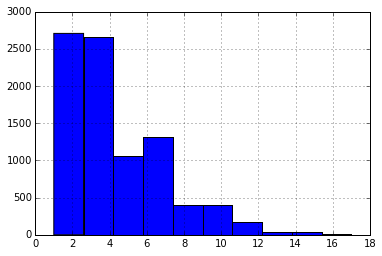

In [26]:
pd.Series(counter.values()).hist()